# Day 1


## Warm up

/Users/danramirez/MBS


([<matplotlib.axis.YTick at 0x136a13150>,
 [Text(0, 0, 'Andorra'),
  Text(0, 1, 'Austria'),
  Text(0, 2, 'Belgium'),
  Text(0, 3, 'Denmark'),
  Text(0, 4, 'Finland'),
  Text(0, 5, 'France'),
  Text(0, 6, 'Germany'),
  Text(0, 7, 'Italy'),
  Text(0, 8, 'Ireland'),
  Text(0, 9, 'Greece')])

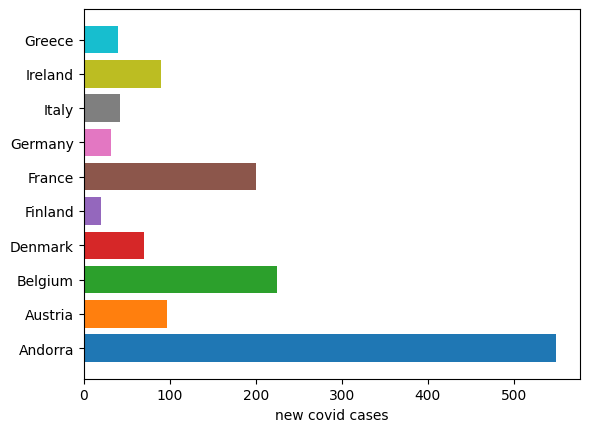

In [1]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/covid02", "covid.xlsx")
df = pd.read_excel(file,index_col='date')

x=np.arange(0,df.loc['2020-10-01'].shape[0])
y=df.loc['2020-10-01',:].values
colormap=plt.cm.tab10(x)
plt.barh(x,y,align='center',color=colormap)
plt.xlabel('new covid cases')
plt.yticks(x,df.columns)
#plt.xticks(x,df.columns,rotation=90)



## Part 1— testing out Yahoo Finance package

In [12]:
import yfinance as yf
import datetime

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)


end_date = datetime.date.today()  # Today's date
start_date = end_date - datetime.timedelta(days=1*365) 

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start=start_date, end=end_date)  # Example: get data from Jan 1, 2010, to Jan 1, 2022

# See your data
print(df)


                                 Open        High         Low       Close  \
Date                                                                        
2023-02-07 00:00:00-05:00  149.802670  154.367153  149.802670  153.790375   
2023-02-08 00:00:00-05:00  153.024674  153.720780  150.329730  151.075562   
2023-02-09 00:00:00-05:00  152.925216  153.472162  149.583892  150.031387   
2023-02-10 00:00:00-05:00  148.856177  150.728571  148.617141  150.399902   
2023-02-13 00:00:00-05:00  150.340146  153.636771  150.310269  153.228439   
...                               ...         ...         ...         ...   
2024-01-31 00:00:00-05:00  187.039993  187.100006  184.350006  184.399994   
2024-02-01 00:00:00-05:00  183.990005  186.949997  183.820007  186.860001   
2024-02-02 00:00:00-05:00  179.860001  187.330002  179.250000  185.850006   
2024-02-05 00:00:00-05:00  188.149994  189.250000  185.839996  187.679993   
2024-02-06 00:00:00-05:00  186.860001  189.309998  186.770004  189.300003   

## Part 2— Buying & Selling Singals

/Users/danramirez/MBS


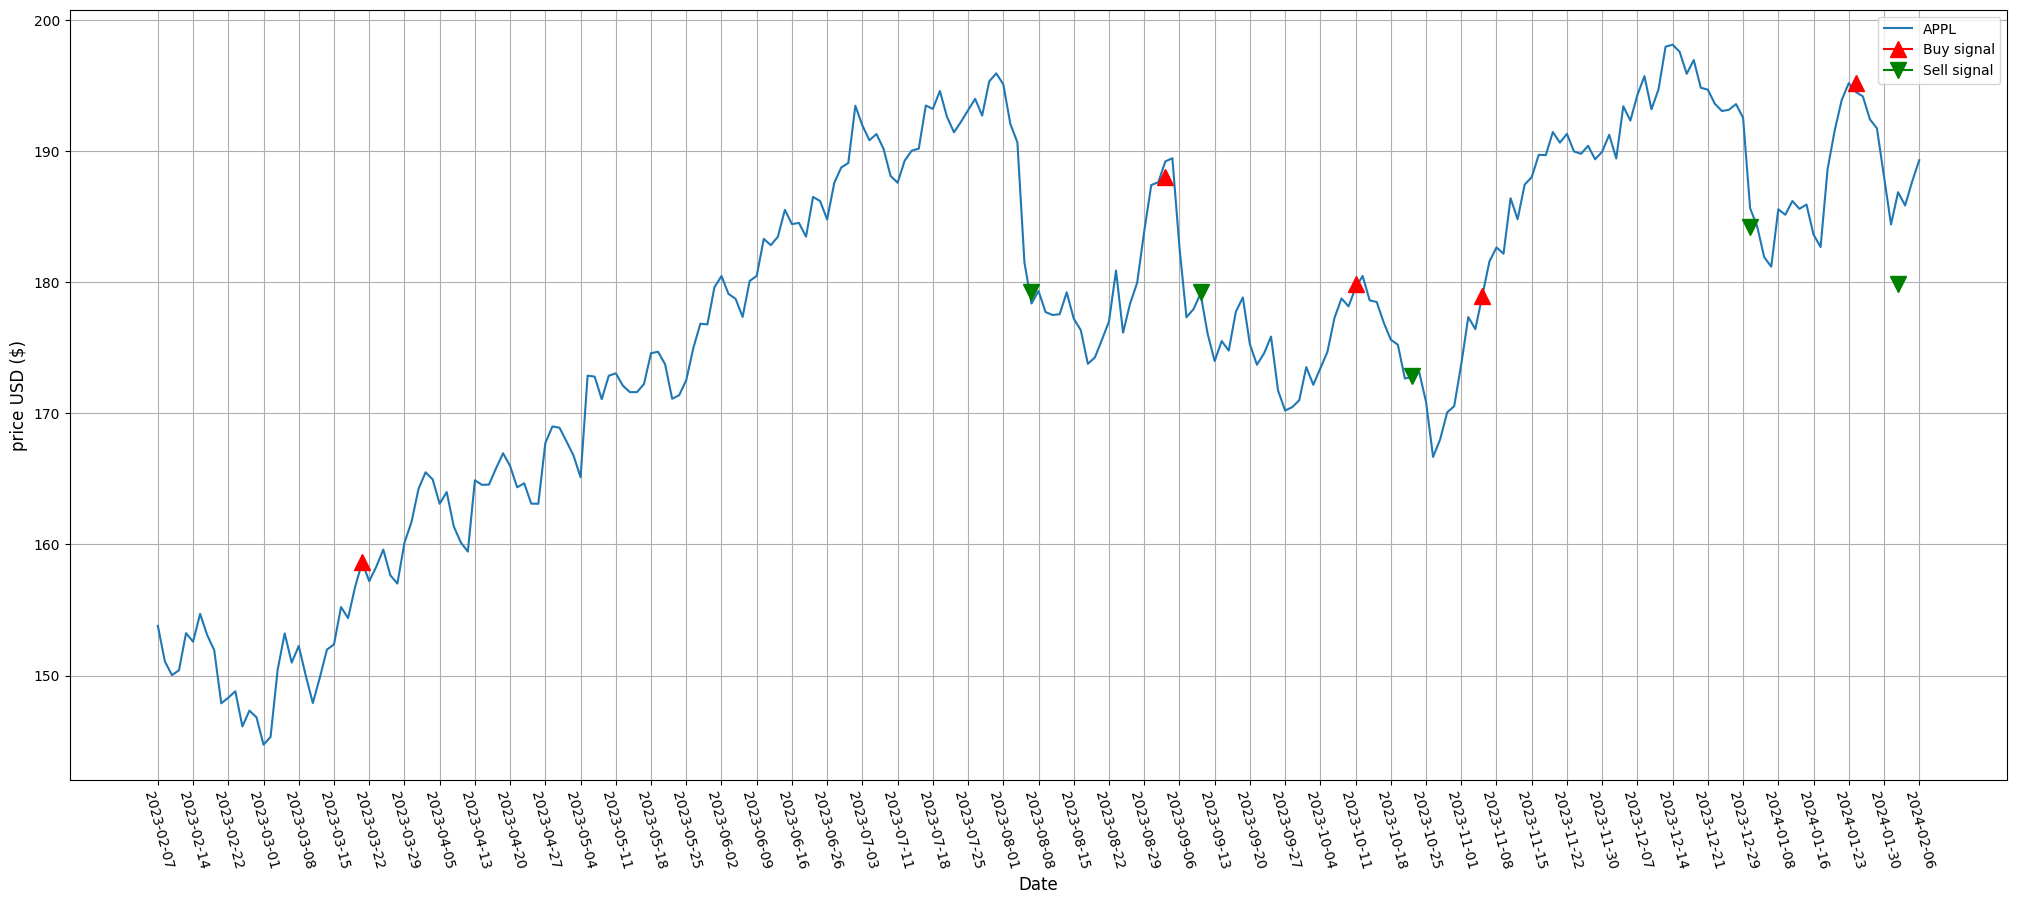

In [13]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import warnings
warnings.filterwarnings('ignore')

#setting long and short paramaters----------------------------------------
short, long= 5 ,30

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

#file = os.path.join(current_directory, "01-data/01-stock", "appl.xlsx")
#df = pd.read_excel(file,index_col='Date')
#print(df.describe())

df['close_short']=df['Close'].rolling(window=short).mean()
df['close_long']=df['Close'].rolling(window=long).mean()
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d')

x5=df['close_short']
x20=df['close_long']
close=df['Close']

# Define function-----------------------------------------------------
def buysellfx(df):
    status = 0
    pricebuy = []
    pricesell = []
    profit = []
    transdays = []
    temp_buyprice = []
    temp_buyindex = []

    for i in range(len(df) - 1):
        if df['close_short'][i] > df['close_long'][i]:
            if status != 1:
                status = 1
                pricebuy.append(df['Open'][i + 1])
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
                temp_buyprice.append(df['Open'][i + 1])
                temp_buyindex.append(i + 1)
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        
        elif df['close_short'][i] < df['close_long'][i]:
            if status != 0:
                status = 0
                pricebuy.append(np.nan)
                pricesell.append(df['Open'][i + 1])
                profit.append(df['Open'][i + 1] - temp_buyprice[-1])
                transdays.append(i + 1 - temp_buyindex[-1])
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        else:
            pricebuy.append(np.nan)
            pricesell.append(np.nan)
            profit.append(np.nan)
            transdays.append(np.nan)

    pricebuy.append(np.nan)
    pricesell.append(np.nan)
    profit.append(np.nan)
    transdays.append(np.nan)

    return pricebuy, pricesell, profit, transdays

# Adding new columns------------------------------------------------------
df['pricebuy'], df['pricesell'], df['profit'], df['transdays'] = buysellfx(df)

#charting data ------------------------------------------------------------
plt.figure(figsize=(25, 10))
plt.plot(close, label='APPL')
#plt.plot(x5, label='Close short')
#plt.plot(x20, label='Close long')

plt.plot(df.index,df['pricebuy'].values,color='red',label='Buy signal',marker='^',markersize=12)
plt.plot(df.index,df['pricesell'].values,color='green',label='Sell signal',marker='v',markersize=12)

n = 5  # Adjust n as per your data
plt.xticks(ticks=df.index[::n], labels=df.index[::n])
plt.xticks(rotation=-75)

plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('price USD ($)',fontsize=12)
plt.grid()

#export to excel-------------------------------------------------------------
df.to_excel(current_directory+'/02-output/stock.xlsx', index=True)
